In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import cmath

In [2]:
a = [0, 1, 2, 3, 4, 5, 6, 7]

# 0 2 4 6 -> 0 4 -> 0 : 4 : 2 6
# 1 3 5 7

In [3]:
# in builf fft
in_fft = np.fft.fft(a)

#in built ifft
in_ifft = np.fft.ifft(in_fft)

print("Inbuilt fft: ")
print(in_fft)
print("Inbuilt ifft: ")
print(in_ifft)

Inbuilt fft: 
[28.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
Inbuilt ifft: 
[0.+0.00000000e+00j 1.-2.02930727e-17j 2.+0.00000000e+00j
 3.+2.02930727e-17j 4.+0.00000000e+00j 5.+2.02930727e-17j
 6.+0.00000000e+00j 7.-2.02930727e-17j]


In [4]:
# User defined FFT
def fft(f):
    M = len(f)
    
    if(M<=1):
        return f
    
    even = f[0::2]
    odd = f[1::2]
    
    G = fft(even)
    H = fft(odd)
    
    #print(G, H, M)
    
    T = []
    #print('H: ', H)
    for i in range(M//2):
        #print(i)
        T.append((np.exp((-2j)*np.pi*i/M))*H[i])
    
    F1 = []
    F2 = []
    for i in range(M//2):
        F1.append(G[i] + T[i])
        F2.append(G[i] - T[i])
    
    F = F1+F2
    #print(F)
    return F

In [5]:
u_fft = fft(a)
print("User defined fft: ")
print(np.array(u_fft))

User defined fft: 
[28.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]


In [6]:
# User defined IFFT
def ifft(f):
    M = len(f)
    
    if(M<=1):
        return f
    
    even = f[0::2]
    odd = f[1::2]
    
    G = ifft(even)
    H = ifft(odd)
    
    T = []
    for i in range(M//2):
        T.append((np.exp((2j)*np.pi*i/M))*H[i])
    
    F1 = []
    F2 = []
    for i in range(len(H)):
        F1.append(G[i] + T[i])
        F2.append(G[i] - T[i])
    
    F = F1+F2
    return F

In [7]:
u_ifft = ifft(u_fft)
print("User defined ifft: ")
print(np.array(u_ifft))
u_ifft = [int(abs(i)/8) for i in u_ifft]
print(u_ifft)

User defined ifft: 
[1.77635684e-15-8.88178420e-16j 8.00000000e+00+4.57695098e-17j
 1.60000000e+01-7.96639400e-16j 2.40000000e+01+1.73058733e-15j
 3.20000000e+01+8.88178420e-16j 4.00000000e+01+4.57695098e-17j
 4.80000000e+01+7.96639400e-16j 5.60000000e+01-1.82212635e-15j]
[0, 1, 2, 3, 4, 5, 6, 7]


# Q2

In [8]:
dog = cv2.imread('Dog.jpg', 0)
lenna = cv2.imread('Lenna.jpg', 0)

In [15]:
def fft_2d(img):
    F = []
    
    for i in range(len(img)):
        F.append(fft(img[i]))
    
    for i in range(len(F[0])):
        tmp = []
        for j in range(len(F)):
            tmp.append(F[j][i])
        
        TMP = fft(tmp)
        for j in range(len(F)):
            F[j][i] = TMP[j]
    
#     print("User defined 2D-FFT: ")
#     print(np.array(F))

    return F

In [10]:
def ifft_2d(img):
    F = []
    
    h, w = len(img), len(img[0])
    for i in range(len(img)):
        F.append(ifft(img[i]))
    
    for i in range(len(F[0])):
        tmp = []
        for j in range(len(F)):
            tmp.append(F[j][i])
        
        TMP = ifft(tmp)
        for j in range(len(F)):
            F[j][i] = TMP[j]
    
    for i in range(len(F)):
        for j in range(len(F[i])):
            F[i][j] = F[i][j]/h*w
    
#     print("User defined 2D-IFFT: ")
#     print(F[0])
    F = np.absolute(F)
    return F

User defined 2D-FFT: 
[[40717472.        +0.00000000e+00j  4849028.22821647-3.56513284e+06j
   1600172.91793854-4.29144015e+05j ... -1026687.47749068-2.81303179e+03j
   1600172.91793854+4.29144015e+05j  4849028.22821647+3.56513284e+06j]
 [ 3718242.02664117+2.57727159e+05j -1274944.02027352-9.38311388e+05j
    933735.89915116-2.82753116e+05j ...   999165.51483208+2.63780782e+06j
  -1808734.62398455-2.12698462e+06j -2716133.55983123-2.07575846e+06j]
 [ -286009.64835789+1.56107790e+06j  -472929.95330662-1.92459211e+06j
   -276071.42369321+7.83531537e+04j ...  -860277.05459484-1.15392400e+06j
    236419.19429946-2.65620718e+04j  1425549.78226093-5.17559243e+04j]
 ...
 [  173173.76320094+2.13675831e+06j   491762.44059486-2.52155748e+05j
   -683072.7820345 -3.05613665e+05j ...  -559771.89860922+1.76639391e+05j
   -223720.09299828+8.64527511e+05j -1229372.30757428-1.32551217e+06j]
 [ -286009.64835789-1.56107790e+06j  1425549.78226093+5.17559243e+04j
    236419.19429946+2.65620718e+04j ...  -6

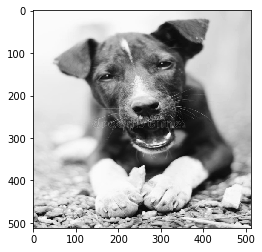

In [14]:
# 2D DFT for dog Image
dog_fft = fft_2d(dog)
print("Inbuilt 2D-FFT: ")
print(np.fft.fft2(dog))
print(len(dog_fft))

dog_ifft = ifft_2d(dog_fft)
print("Inbuilt 2D-IFFT: ")
print(np.fft.ifft2(dog_fft))
print(len(dog_ifft))

plt.imshow(dog_ifft, cmap='gray')
plt.show()

512
512


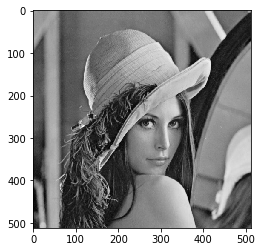

In [16]:
# 2D DFT for lenna Image
lenna_fft = fft_2d(lenna)
print(len(lenna_fft))

lenna_ifft = ifft_2d(lenna_fft)
print(len(lenna_ifft))

plt.imshow(lenna_ifft,cmap='gray')
plt.show()

In [17]:
def get_magnitude(f):
    mag = []
    
    for i in range(len(f)):
        tmp = []
        for j in range(len(f[i])):
            tmp.append((f[i][j].real**2+f[i][j].imag**2)**0.5)
        mag.append(tmp)
        
    return mag

def get_phase(f):
    phase = []
    
    for i in range(len(f)):
        tmp = []
        for j in range(len(f[i])):
            #tmp.append(math.atan(f[i][j].imag/f[i][j].real))
            tmp.append((cmath.phase(f[i][j])))
        phase.append(tmp)
    
    return phase

In [18]:
mag_dog = get_magnitude(dog_fft)
mag_lenna = get_magnitude(lenna_fft)

phase_dog = get_phase(dog_fft)
phase_lenna = get_phase(lenna_fft)

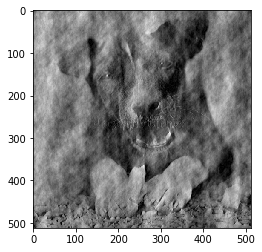

In [19]:
# Dog phase and Lenna magnitude
out1 = [[0 for i in range(512)] for j in range(512)]
for i in range(512):
    for j in range(512):
        out1[i][j] = mag_lenna[i][j]*np.exp(1j*phase_dog[i][j])


out1_ = ifft_2d(out1)
plt.imshow(out1_, cmap='gray')
plt.show()
# print(dog_[0])

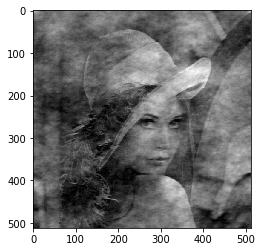

In [20]:
# Lenna phase and Dog magnitude
out2 = [[0 for i in range(512)] for j in range(512)]
for i in range(512):
    for j in range(512):
        out2[i][j] = mag_dog[i][j]*np.exp(1j*phase_lenna[i][j])


out2_ = ifft_2d(out2)
plt.imshow(out2_, cmap='gray')
plt.show()
# print(dog_[0])

# Done

In [82]:
import cmath

print(cmath.phase(3+4j))

print(math.atan(4/3))

0.9272952180016122
0.9272952180016122


In [54]:
x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

for i in range(len(x[0])):
    for j in range(len(x)):
        print(x[j][i])
    print("Ya")

1
4
7
Ya
2
5
8
Ya
3
6
9
Ya
